# **Group 3** 
- Asmaa Alzahrani
- Sarah Alzahrani
- Shrouq Alharbi
- Rawan  Alsherhri 
- Khalid Alsuhaimi  
-Amani Almutairi



# **Predicting House Prices with Machine Learning**



- Predicting a sale price for a house based on the geographical variables (region location and distance from CBD).
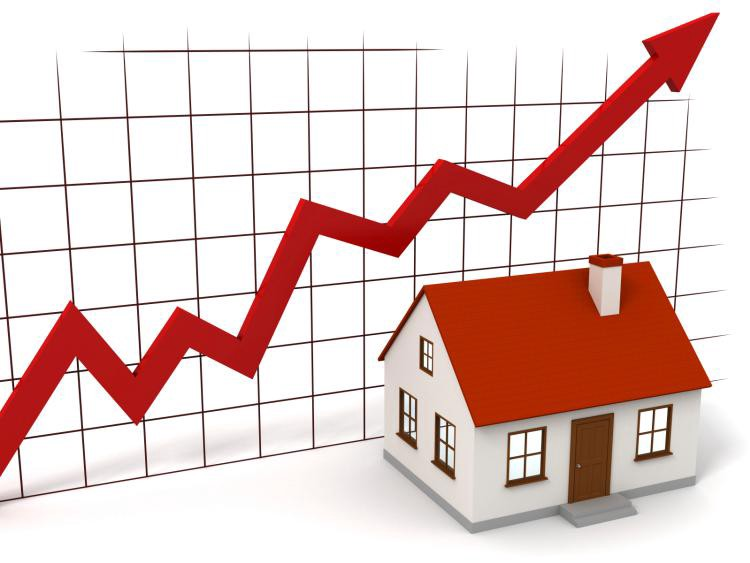

# Proposal 
### Area of FinTech:
RealTech

### Dataset researched and located:
Kaggle.com

Link of data_set:
https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

### ML Use Case:
#### House Price Prediction: 
 ـ Predicting a sale price for a house based on the geographical variables (region location and distance from CBD). 
 
 ـ Predicting a sale price for a house based on the size of house (ex: number of bedrooms).

### ML model selected:
Random forest regressor.

**Reason:**
Given that the objective of this project is to predict the price of a house, which is a numerical and continuous output, this is a regression task. Therefore, the random forest regression machine learning model is used. While the random forest requires a significant amount of time to train, it provides the best accuracy and ideal prediction. In addition, the data set we chose is large and contains a variety of variables, and the random forest algorithm is well-suited for processing large amounts of data and executing complex tasks.

## Project Draft

In **machine learning**, there are classification and regression models. The difference of the two is that classification predict the output (or y) as either yes or no, 1 or 0, or some other categories. However, in regression, the output that we want is the value, like what will be the price of the house.

In this House price prediction, it is a good practice for the regression model. Because in the output we need to predict a continuous value.

# Importing required packages


In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from scipy.stats import spearmanr
import seaborn as sns


import warnings  
warnings.filterwarnings('ignore')


# Load data


In [ ]:
#load datset
df=pd.read_csv('melb_data.csv')
print(df.shape)

(13580, 21)




#Exploratory Data Analysis:

# - Data cleaning

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
#looking at the features in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

We can see some features are numeric while others are text. There are also missing values in the dataset.

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Find columns with missing values and their percent missing
df.isnull().sum()                                                     
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val


,MissvalCount,Percent
BuildingArea,6450,47.50
YearBuilt,5375,39.58
CouncilArea,1369,10.08
Car,62,0.46


Missing values are there in data so we need to fill them.

Firstly, we shall look at the relationship of the features which has missing values with the Price of house.

For Feature Car :



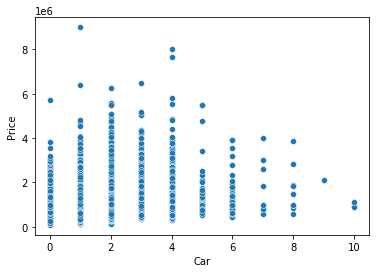

In [ ]:
sns.scatterplot(x = df["Car"],y = df["Price"])

In [ ]:
df["Car"].value_counts()

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

For BuildingArea

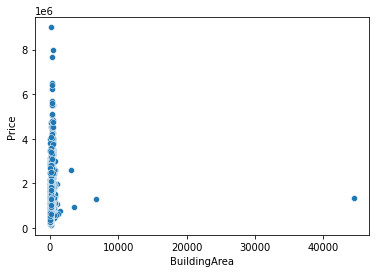

In [ ]:
sns.scatterplot(x = df["BuildingArea"],y = df["Price"]);


In [ ]:
df["BuildingArea"].value_counts()


120.00    114
110.00     89
100.00     88
130.00     84
115.00     77
         ... 
113.81      1
134.60      1
82.60       1
165.50      1
477.00      1
Name: BuildingArea, Length: 602, dtype: int64

For YearBuilt



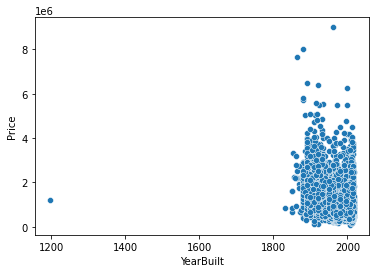

In [ ]:
sns.scatterplot(x = df["YearBuilt"],y = df["Price"]);


In [ ]:
df["YearBuilt"].value_counts()


1970.0    866
1960.0    725
1950.0    580
1900.0    341
1980.0    338
         ... 
1901.0      1
1921.0      1
1898.0      1
1884.0      1
1897.0      1
Name: YearBuilt, Length: 144, dtype: int64

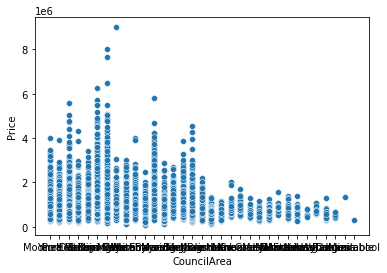

In [ ]:
sns.scatterplot(x = df["CouncilArea"],y = df["Price"]);


In [ ]:
df["CouncilArea"].value_counts()


Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Moorabool               1
Unavailable             1
Name: CouncilArea, dtype: int64

By seeing the graphs we can fill the missing values with forward values or backward values as they are in either increasing order or decreasing order continuously

In [ ]:
df = df.fillna(method='ffill').fillna(method='bfill')


In [ ]:
#check null record
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [ ]:
#looking at the features in the dataset after cleaning.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
# Check the dimension of the dataset after cleaning our data.
df.shape

(13580, 21)

The dataset is cleaned. It now has 13580 observations and 21 features.



In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.609573,558.416127,150.029937,1964.621208,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962511,3990.669241,399.051116,39.017624,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,94.000000,1945.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,127.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,175.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Let's now forward with data visualization using a Heatmap

# Data Visulaization 







Feature Selection :


* Correlation between Variables

We wil use heatmap to view the corelation between variables.

**Heatmap:**

Heatmaps are very useful to find relations between two variables in a dataset. Heatmap can be easily produced using the ‘heatmap’ function provided by the seaborn package in python.







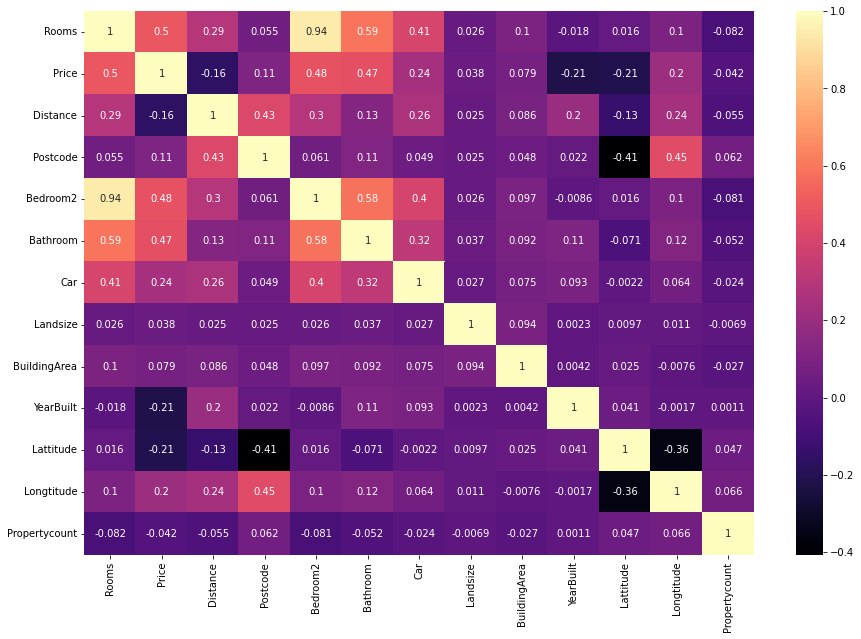

In [ ]:
plt.figure(figsize=(15,10))

sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

In [ ]:
df[df.columns[:]].corr()['Price'][:]


Rooms            0.496634
Price            1.000000
Distance        -0.162522
Postcode         0.107867
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238302
Landsize         0.037507
BuildingArea     0.078818
YearBuilt       -0.214390
Lattitude       -0.212934
Longtitude       0.203656
Propertycount   -0.042153
Name: Price, dtype: float64

*  A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
*A value closer to 1 implies stronger positive correlation
*A value closer to -1 implies stronger negative correlation.




In [ ]:
# drop columns with less correlation  and we don't need it
df = df.drop(['YearBuilt', 'Propertycount', 'Lattitude' , 'Longtitude' , 'Distance' ], axis=1)

So all the column data remains the same except the (YearBuilt, Propertycount, Lattitude, Longtitude, Distance ) columns are dropped. 

In [ ]:
# show the data type of columns 
df.dtypes

Suburb           object
Address          object
Rooms             int64
Type             object
Price           float64
Method           object
SellerG          object
Date             object
Postcode        float64
Bedroom2        float64
Bathroom        float64
Car             float64
Landsize        float64
BuildingArea    float64
CouncilArea      object
Regionname       object
dtype: object

# Building a Model

* Applying machine learning algorithm



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [ ]:
# Choosing the target variable

y = df["Price"]
del df["Price"]

In [ ]:
#Performing one hot encoding for categorical features.


df["Suburb"] = pd.get_dummies(df["Suburb"])
df["Address"] = pd.get_dummies(df["Address"])
df["Method"] = pd.get_dummies(df["Method"])
df["SellerG"] = pd.get_dummies(df["SellerG"])
df["Regionname"] = pd.get_dummies(df["Regionname"])
df["CouncilArea"] = pd.get_dummies(df["CouncilArea"])
df["Type"] = pd.get_dummies(df["Type"])

In [ ]:
# Chossing features for predicting target variable

df_temp = df.select_dtypes(include=["int64","float64"]) 
X = df_temp

Train-Test Split dataset:

Before we can start modeling the data, we need to split the dataset into training and test sets. We will train the models with the training set and cross-validate with the test set. Recall we have lots of features in the dataset that are text. Most machine learning models require numerical input features. Since the process of converting text features to a numeric representation an involved task, we will only use the numeric features in our price prediction (for simplicity sake).

In [ ]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Random Forest Regression Model


In [ ]:
# create the model 
# q. whay 13 in max depth
rf_model =  RandomForestRegressor(max_depth=13, random_state=0)


In [ ]:
# fit the training Data 
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=13, random_state=0)

In [ ]:
# Predicting the data using the model
rf_pred = rf_model.predict(X_test)
rf_pred

array([1517297.5446308 ,  834303.45608612,  603344.37211023, ...,
       1044385.39700384,  684152.43929121, 1003363.5625798 ])

In [ ]:
# calculate the accuracy score 
rf_score= rf_model.score(X_test,y_test)

## Multiple Linear Regression:

In [ ]:
# Craete the model
mlr_model = LinearRegression()

In [ ]:
#fit the training Data 
mlr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Predicting the data using the model
mlr_pred = dt_model.predict(X_test)

In [ ]:
# calculate the accuracy score 
mlr_score= dt_model.score(X_test,y_test)

# Evaluating the Modles 


In [ ]:
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Random forest Regression'],
                            'Score':[mlr_score,rf_score]
                           })


In [ ]:
models_score.sort_values(by='Score',ascending=False)

,Model,Score
1,Random forest Regression,0.652593
0,Multiple Linear Regression,0.445450


# Done !